# Part 2 : House price

Let's first import take a look at the data:

In [1]:
import pandas as pd

data = pd.read_csv('house-prices.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [2]:
data_col = data.columns.tolist()

In [3]:
data.shape # Checking the shape of the dataframe

(2430, 82)

## Data Cleaning

Let's first clean the data.

First, we know that the Order and PID variables are identifiers and therefore, they are not useful to predict house prices. Let's drop them.

In [4]:
data.drop(['Order','PID'], axis=1, inplace=True)
data.shape # New shape of the data

(2430, 80)

Now that we did an overview of the data, let's check if we've got any duplicated rows or missing values.

In [5]:
data.duplicated().sum() # Check if any duplicated rows

0

Let's now print the numbert of rows with at least one missing values.

In [6]:
data[data.isnull().any(axis=1)].shape[0]

2430

Well, we can see that every rows of the dataframe contain at least one missing value, let's adress them, but first, we're going to check the datatype of the columns.

In [7]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

As we could have expected, we've got 3 differents datatypes: integer, float and oject. Let's create a list for each columns datatype.

In [8]:
list_float=list(data.select_dtypes(include=['float64'])) # Creating list for all dtype
list_int=list(data.select_dtypes(include=['int64']))
list_obj=list(data.select_dtypes(include=['O']))

print(len(list_float))
print(len(list_int))
print(len(list_obj))

11
26
43


Now, let's adress those missing values. But first, let's visualize their proportion.

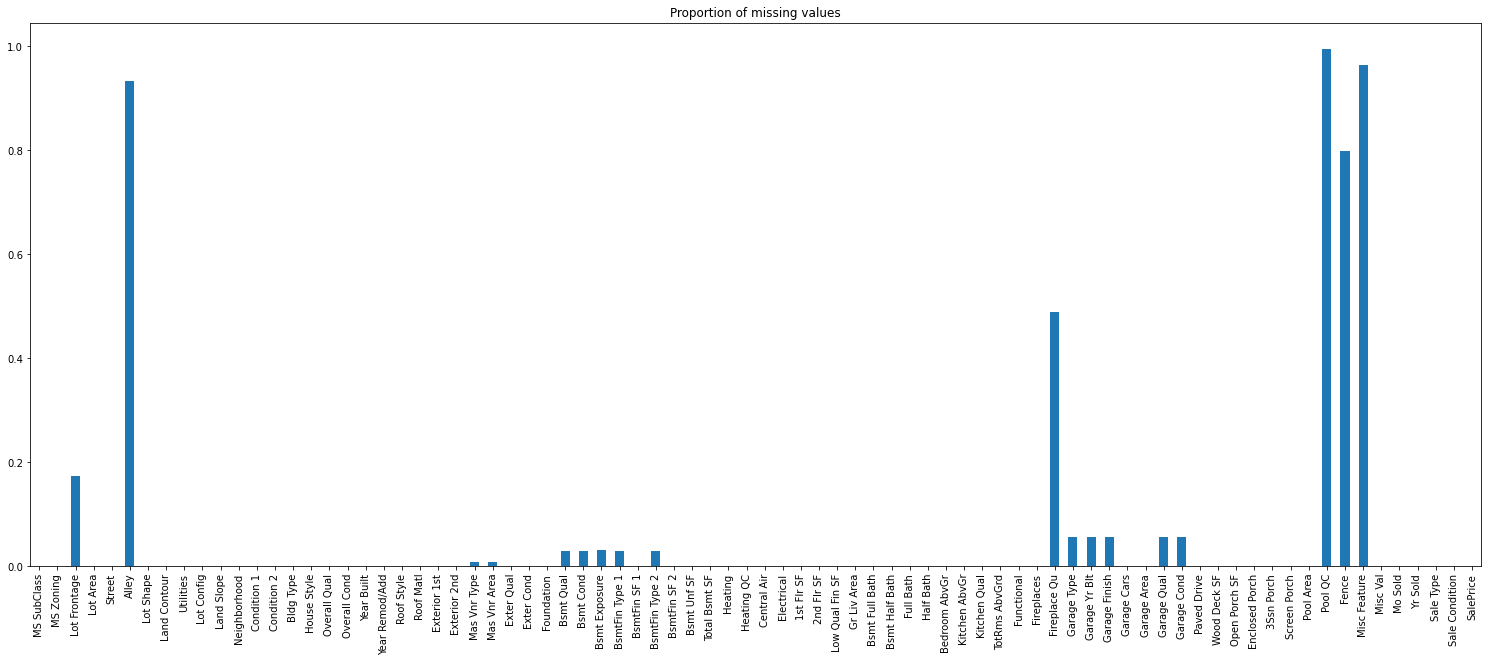

In [9]:
import matplotlib.pyplot as plt

data.isnull().mean().plot.bar(figsize=(26, 10))
plt.title('Proportion of missing values')
plt.show()

Now that we can see well the proportion, we can choose a method. For the columns with few missing values, we can choose to fill the missing values with the most frequent value, because we have a lot of data. However, we can see that there are others features that contain a lot of missing values. This is due to the fact that they represent description of other feature that the house may doesn't have. For example, 'Pool QC' represents the quality of the pool. Therefore, for the houses that don't have pool, a NaN is attributed. Let's firt adress those missing values.

In [10]:
data[['Alley', 'Fence', 'Misc Feature','Fireplace Qu', 'Pool QC']] = data[['Alley', 'Fence', 'Misc Feature', 'Fireplace Qu', 'Pool QC']].fillna(value='Missing')

Now, let's see what are exactly the columns that contain missing values.

In [11]:
missing_col = data.columns[data.isnull().any()].tolist()
missing_col

['Lot Frontage',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

Good, those columns look to have missing values for another reason than because of missing information. For example, for the garage type, it means that there is no garage.

In [12]:
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(value = data['Year Built'])

In [13]:
data[list(data[missing_col].select_dtypes(include=['O']))] = data[list(data[missing_col].select_dtypes(include=['O']))].fillna(value = 'Missing')
data[list(data[missing_col].select_dtypes(include=['int64', 'float64']))] = data[list(data[missing_col].select_dtypes(include=['int64', 'float64']))].fillna(value = 0)

Great, now we shouldn't have any missing values left.

In [14]:
data.isnull().sum().sum() # Checking the number of missing values

0

Now that we have filled all the missing values, let's handle the ouliers.

In [15]:
data.shape

(2430, 80)

First, let's visualize the float columns to see if we can see some obvious outliers

In [16]:
num_list = data._get_numeric_data().columns.tolist()

In [17]:
num_list

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

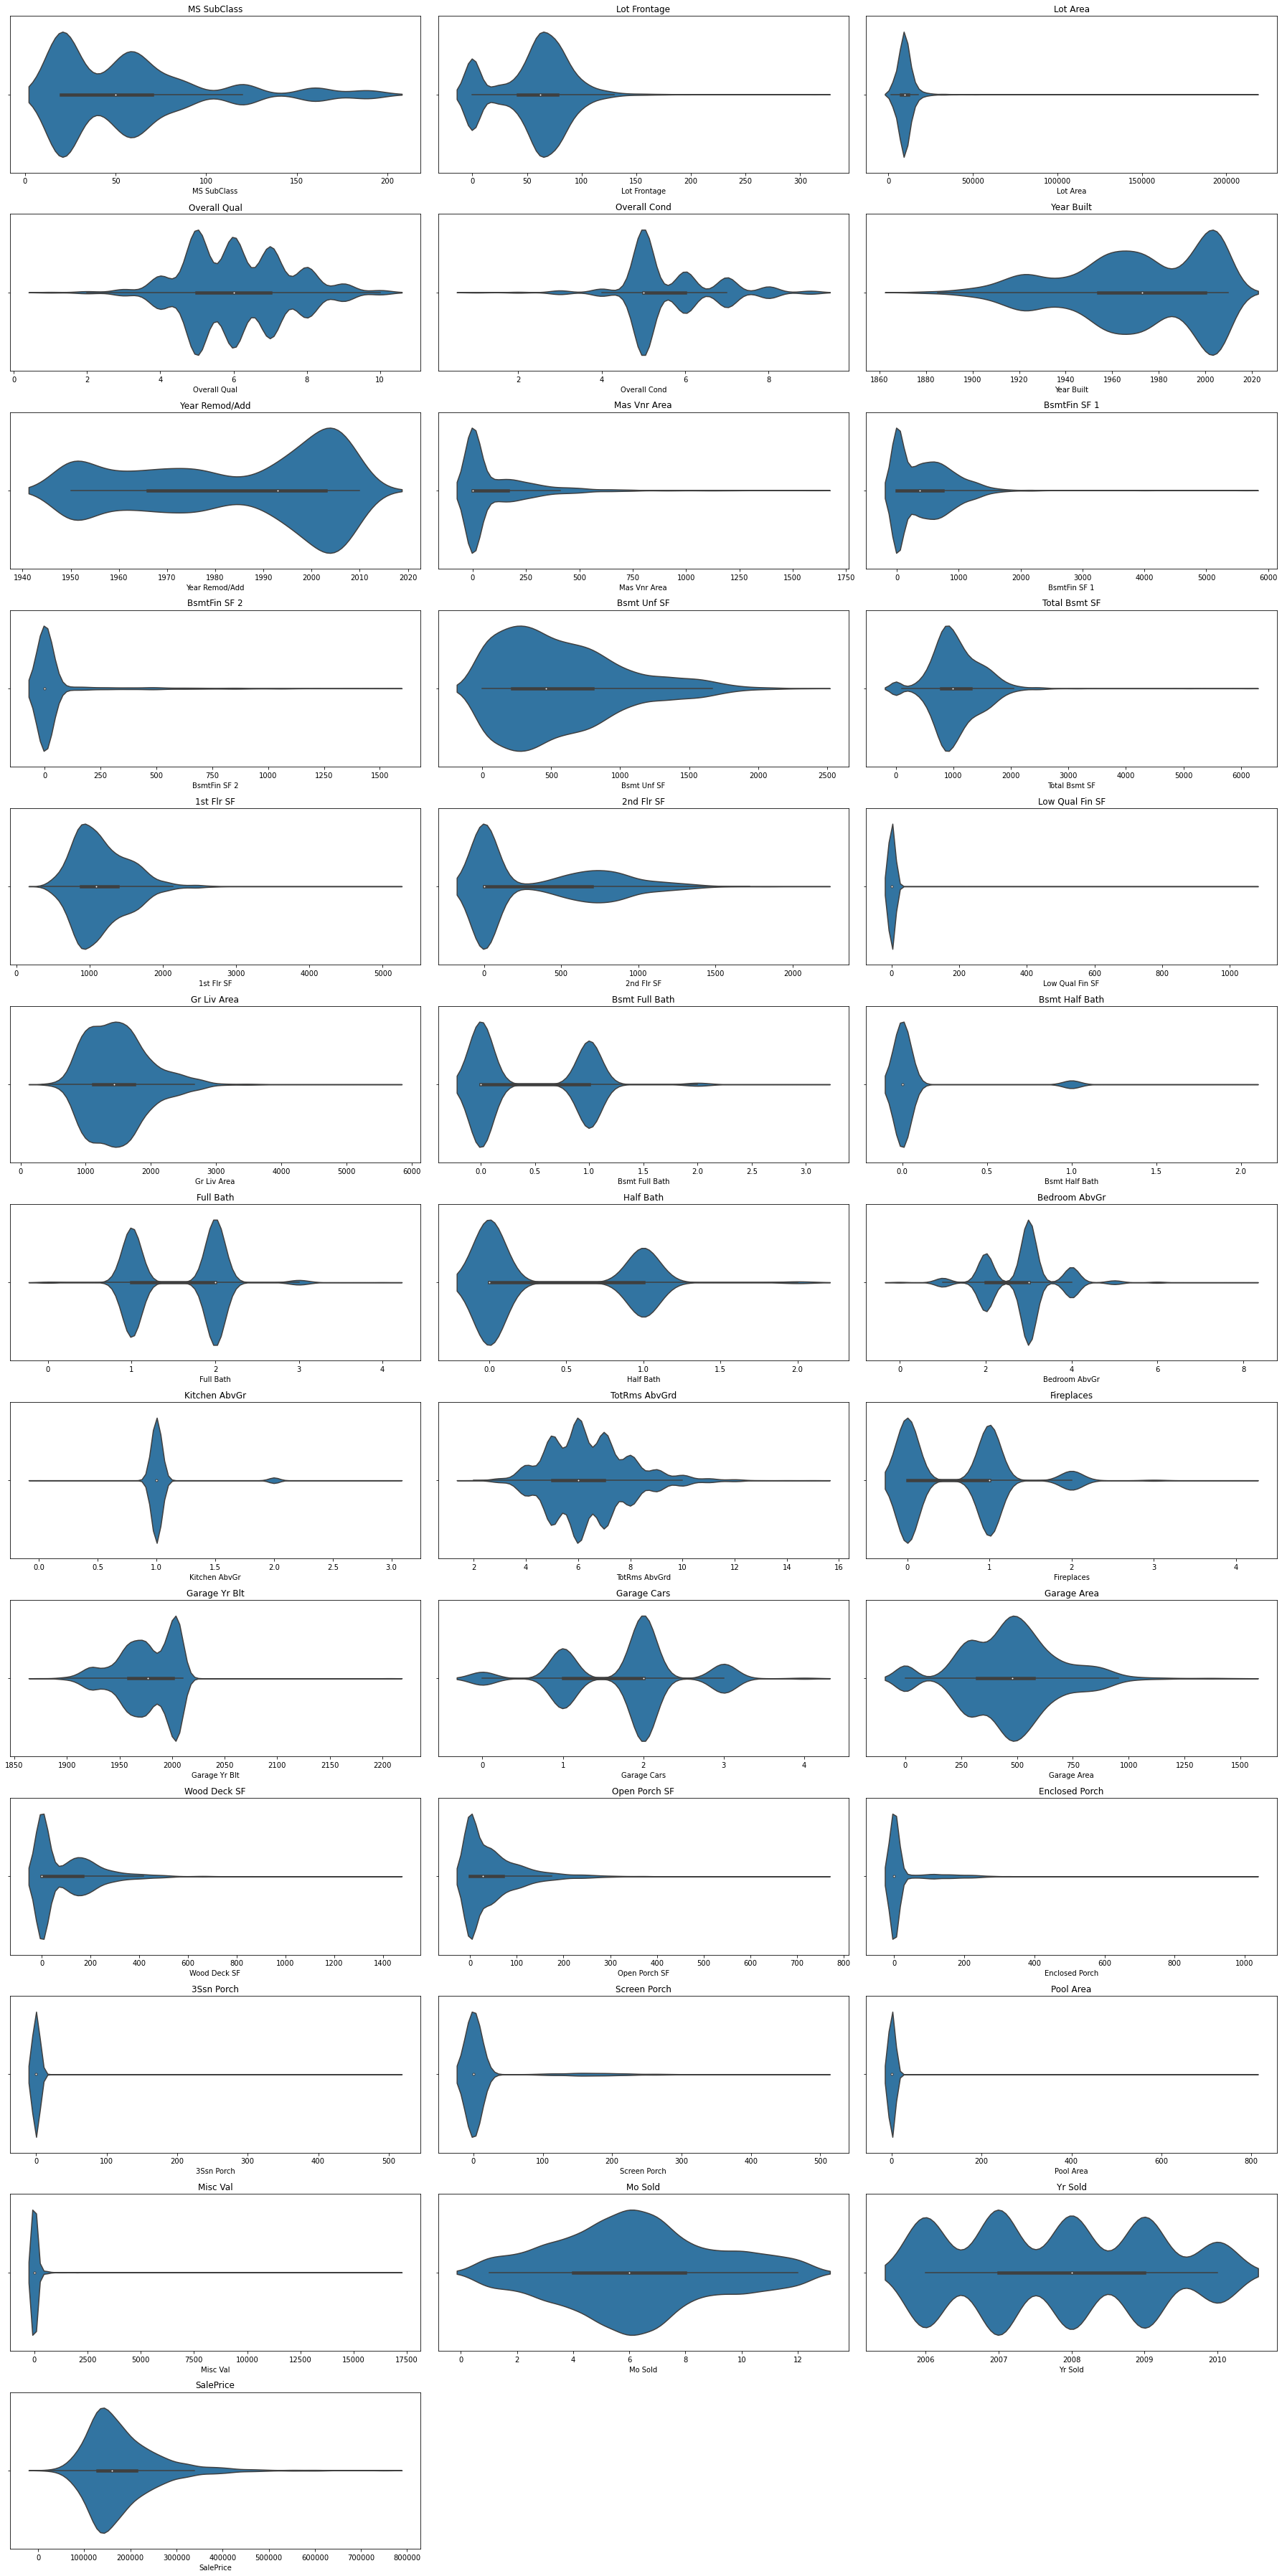

In [18]:
import seaborn as sns

figure = plt.figure(figsize=(25, 50))

for col in (num_list):
    subplot = figure.add_subplot(13, 3, num_list.index(col)+1)
    sns.violinplot(x=data[col])
    plt.title(''+ col)

figure.tight_layout()

First we can see that we have 3 columns that are supposed to be integers, but that are float because of incorrect values. For example, the number garage cars can't be a float. Let's replace those unrealistic values with his integer value.

In [19]:
unrealistic_list=['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars']

for column in unrealistic_list:
    for i in range (data.shape[0]):
        data[column][i]=int(data[column][i])
    data[column]=data[column].astype(int)

/var/folders/mk/q507z2ts3294t2g0662rr7100000gn/T/ipykernel_43270/1694614033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i]=int(data[column][i])


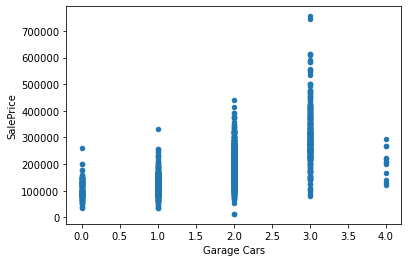

In [20]:
data.plot.scatter(x='Garage Cars', y='SalePrice')
plt.show()

We can see that, for example, the garage cars column is now composed only of integer

In [21]:
# Updating the float list
list_float=list(data.select_dtypes(include=['float64'])) # Creating list for all dtype

Now let's remove by hand the obvious ouliers.

In [22]:
data.drop(data[(data['Lot Frontage']>150)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Lot Area']>50000)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Mas Vnr Area']>800)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data[num_list[8]]>2000)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['1st Flr SF']>3000)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Low Qual Fin SF']>100)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Gr Liv Area']>3500)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Garage Yr Blt']>2022)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Wood Deck SF']>600)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Open Porch SF']>400)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Enclosed Porch']>350)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['3Ssn Porch']>50)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Pool Area']>75)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['Misc Val']>1500)].index.tolist(), inplace = True)
print(data.shape)
data.drop(data[(data['SalePrice']>550000)].index.tolist(), inplace = True)
print(data.shape)

(2417, 80)
(2405, 80)
(2385, 80)
(2379, 80)
(2378, 80)
(2352, 80)
(2351, 80)
(2350, 80)
(2342, 80)
(2336, 80)
(2334, 80)
(2306, 80)
(2301, 80)
(2286, 80)
(2283, 80)


In [23]:
data.shape

(2283, 80)

As we see those plots, we can already have some ideas for the feature engeneering part.


First, we can see that we have two variables : 'First floor square feet' and 'Second floor square feet'. What we can do there is bring those variables together and create one : 'Floor square feet'. While doing this, we'll create another variable : '2nd floor', with a one if there is one, and with a 0 if there is no second floor.

Second, we'll do the exact same thing with the porches features.

## Feature encoding



In order to encode well the data, we will do two separated lists that hold each either the nominal variables or the ordinal variables.

In [24]:
# Creating nominal list

nominal = ['Misc Feature',
           'Alley',
           'MS SubClass',
           'MS Zoning',
           'Street',
           'Land Contour',
           'Lot Config',
           'Neighborhood',
           'Condition 1',
           'Condition 2',
           'Bldg Type',
           'House Style',
           'Roof Style',
           'Roof Matl',
           'Exterior 1st',
           'Exterior 2nd',
           'Mas Vnr Type',
           'Foundation',
           'Heating',
           'Central Air',
           'Sale Type',
           'Sale Condition',
           'Garage Type']
len(nominal)

23

In [25]:
# Creating an ordinal list

ordinal = ['Fireplace Qu',
           'Fence',
           'Pool QC',
           'Lot Shape',
           'Utilities',
           'Land Slope',
           'Overall Qual',
           'Overall Cond',
           'Exter Qual',
           'Exter Cond',
           'Bsmt Qual',
           'Bsmt Cond',
           'Bsmt Exposure',
           'BsmtFin Type 1',
           'BsmtFin Type 2',
           'Heating QC',
           'Electrical',
           'Kitchen Qual',
           'Functional',
           'Fireplace Qu',
           'Garage Finish',
           'Garage Qual',
           'Garage Cond',
           'Paved Drive']

len(ordinal)

24

Now, we've got our lists, we can start the encoding. First, for the nominal variables, we'll apply one-hot encoding. For the ordinal variables, we'll ordinate them and give them 'grades', because one-hot encoding would not be the best, as it doesn't sort the variables of the feature. However, a 'grade' is already assign for some of them (e.g Overall Quad). So we'll delete from the ordinal list the numerical variable.

In [26]:
for variable in ordinal:
    if data[variable].dtype=='int64':
            print(variable)

Overall Qual
Overall Cond


In [27]:
ordinal.remove('Overall Qual')
ordinal.remove('Overall Cond')
len(ordinal)

22

Our determination of the grade will be base on the average sale price of the variable sale price. Below we took the example of the exterior quality, where 'Ex' (Excellent) will have the best grade while 'Fa' will have the worst grade. This will not work perfectly, but we can see it as a great way to assign grade without having to look at all the features and analyse them.

In [28]:
data['SalePrice'].groupby(data['Exter Qual']).mean().sort_values()

Exter Qual
Fa     88994.000000
TA    141795.911392
Gd    226346.398957
Ex    361567.179104
Name: SalePrice, dtype: float64

In [29]:
import numpy as np

for feature in ordinal:
    sorted_list = data['SalePrice'].groupby(data[feature]).mean().sort_values().index.tolist()
    grade_list = np.arange(len(sorted_list))
    for i in range(len(sorted_list)):
        data[feature] = data[feature].replace([sorted_list[i]], grade_list[i])

In [30]:
data.shape

(2283, 80)

We can see that it worked well. Now let's encode the nominal values with the one-hot encoding method.

In [31]:
# One-hot encoding

data = pd.get_dummies(data, columns = nominal)

In [32]:
data.shape

(2283, 238)

We can see that the shape of the data has changed.

## Feature engineering


Now that we have encoded all our features, let's create new ones, and create lists holding the continuous and discrete variables.

In [33]:
continuous = ['Lot Frontage',
              'Lot Area',
              'Mas Vnr Area',
              'BsmtFin SF 1',
              'BsmtFin SF 2',
              'Bsmt Unf SF',
              'Total Bsmt SF',
              'Floor SF',
              'Low Qual Fin SF',
              'Gr Liv Area',
              'Garage Area',
              'Wood Deck SF',
              'Pool Area',
              'Misc Val',
              'SalePrice']

In [34]:
discrete = ['Year Built',
            'Year Remod/Add',
            'Bsmt Full Bath',
            'Bsmt Half Bath',
            'Full Bath',
            'Half Bath',
            'Bedroom AbvGr',
            'Kitchen AbvGr',
            'TotRms AbvGrd',
            'Fireplaces',
            'Porch SF',
            'Garage Yr Blt',
            'Garage Cars',
            'Mo Sold',
            'Yr Sold']

Let's create the variables that we mentionned previously.

In [35]:
# Create the total floor square feet variables
data['Floor SF'] = data['1st Flr SF'] + data['2nd Flr SF']

In [36]:
# Create a variable that indicates if there is a second floor
data['Second floor'] = data['2nd Flr SF']

data.loc[data['Second floor']>0, 'Second floor'] = 1

In [37]:
# Dropping the other variables
data.drop(['1st Flr SF', '2nd Flr SF'], axis = 1, inplace = True)

In [38]:
data['Porch SF'] = data['Open Porch SF'] + data['Enclosed Porch'] + data['3Ssn Porch'] + data['Screen Porch']

In [39]:
data.loc[data['Open Porch SF']>0, 'Open Porch SF'] = 1
data.loc[data['Enclosed Porch']>0, 'Enclosed Porch'] = 1
data.loc[data['3Ssn Porch']>0, '3Ssn Porch'] = 1
data.loc[data['Screen Porch']>0, 'Screen Porch'] = 1

First, let's see if some distributions are skewed in the continuous and discrete data. 

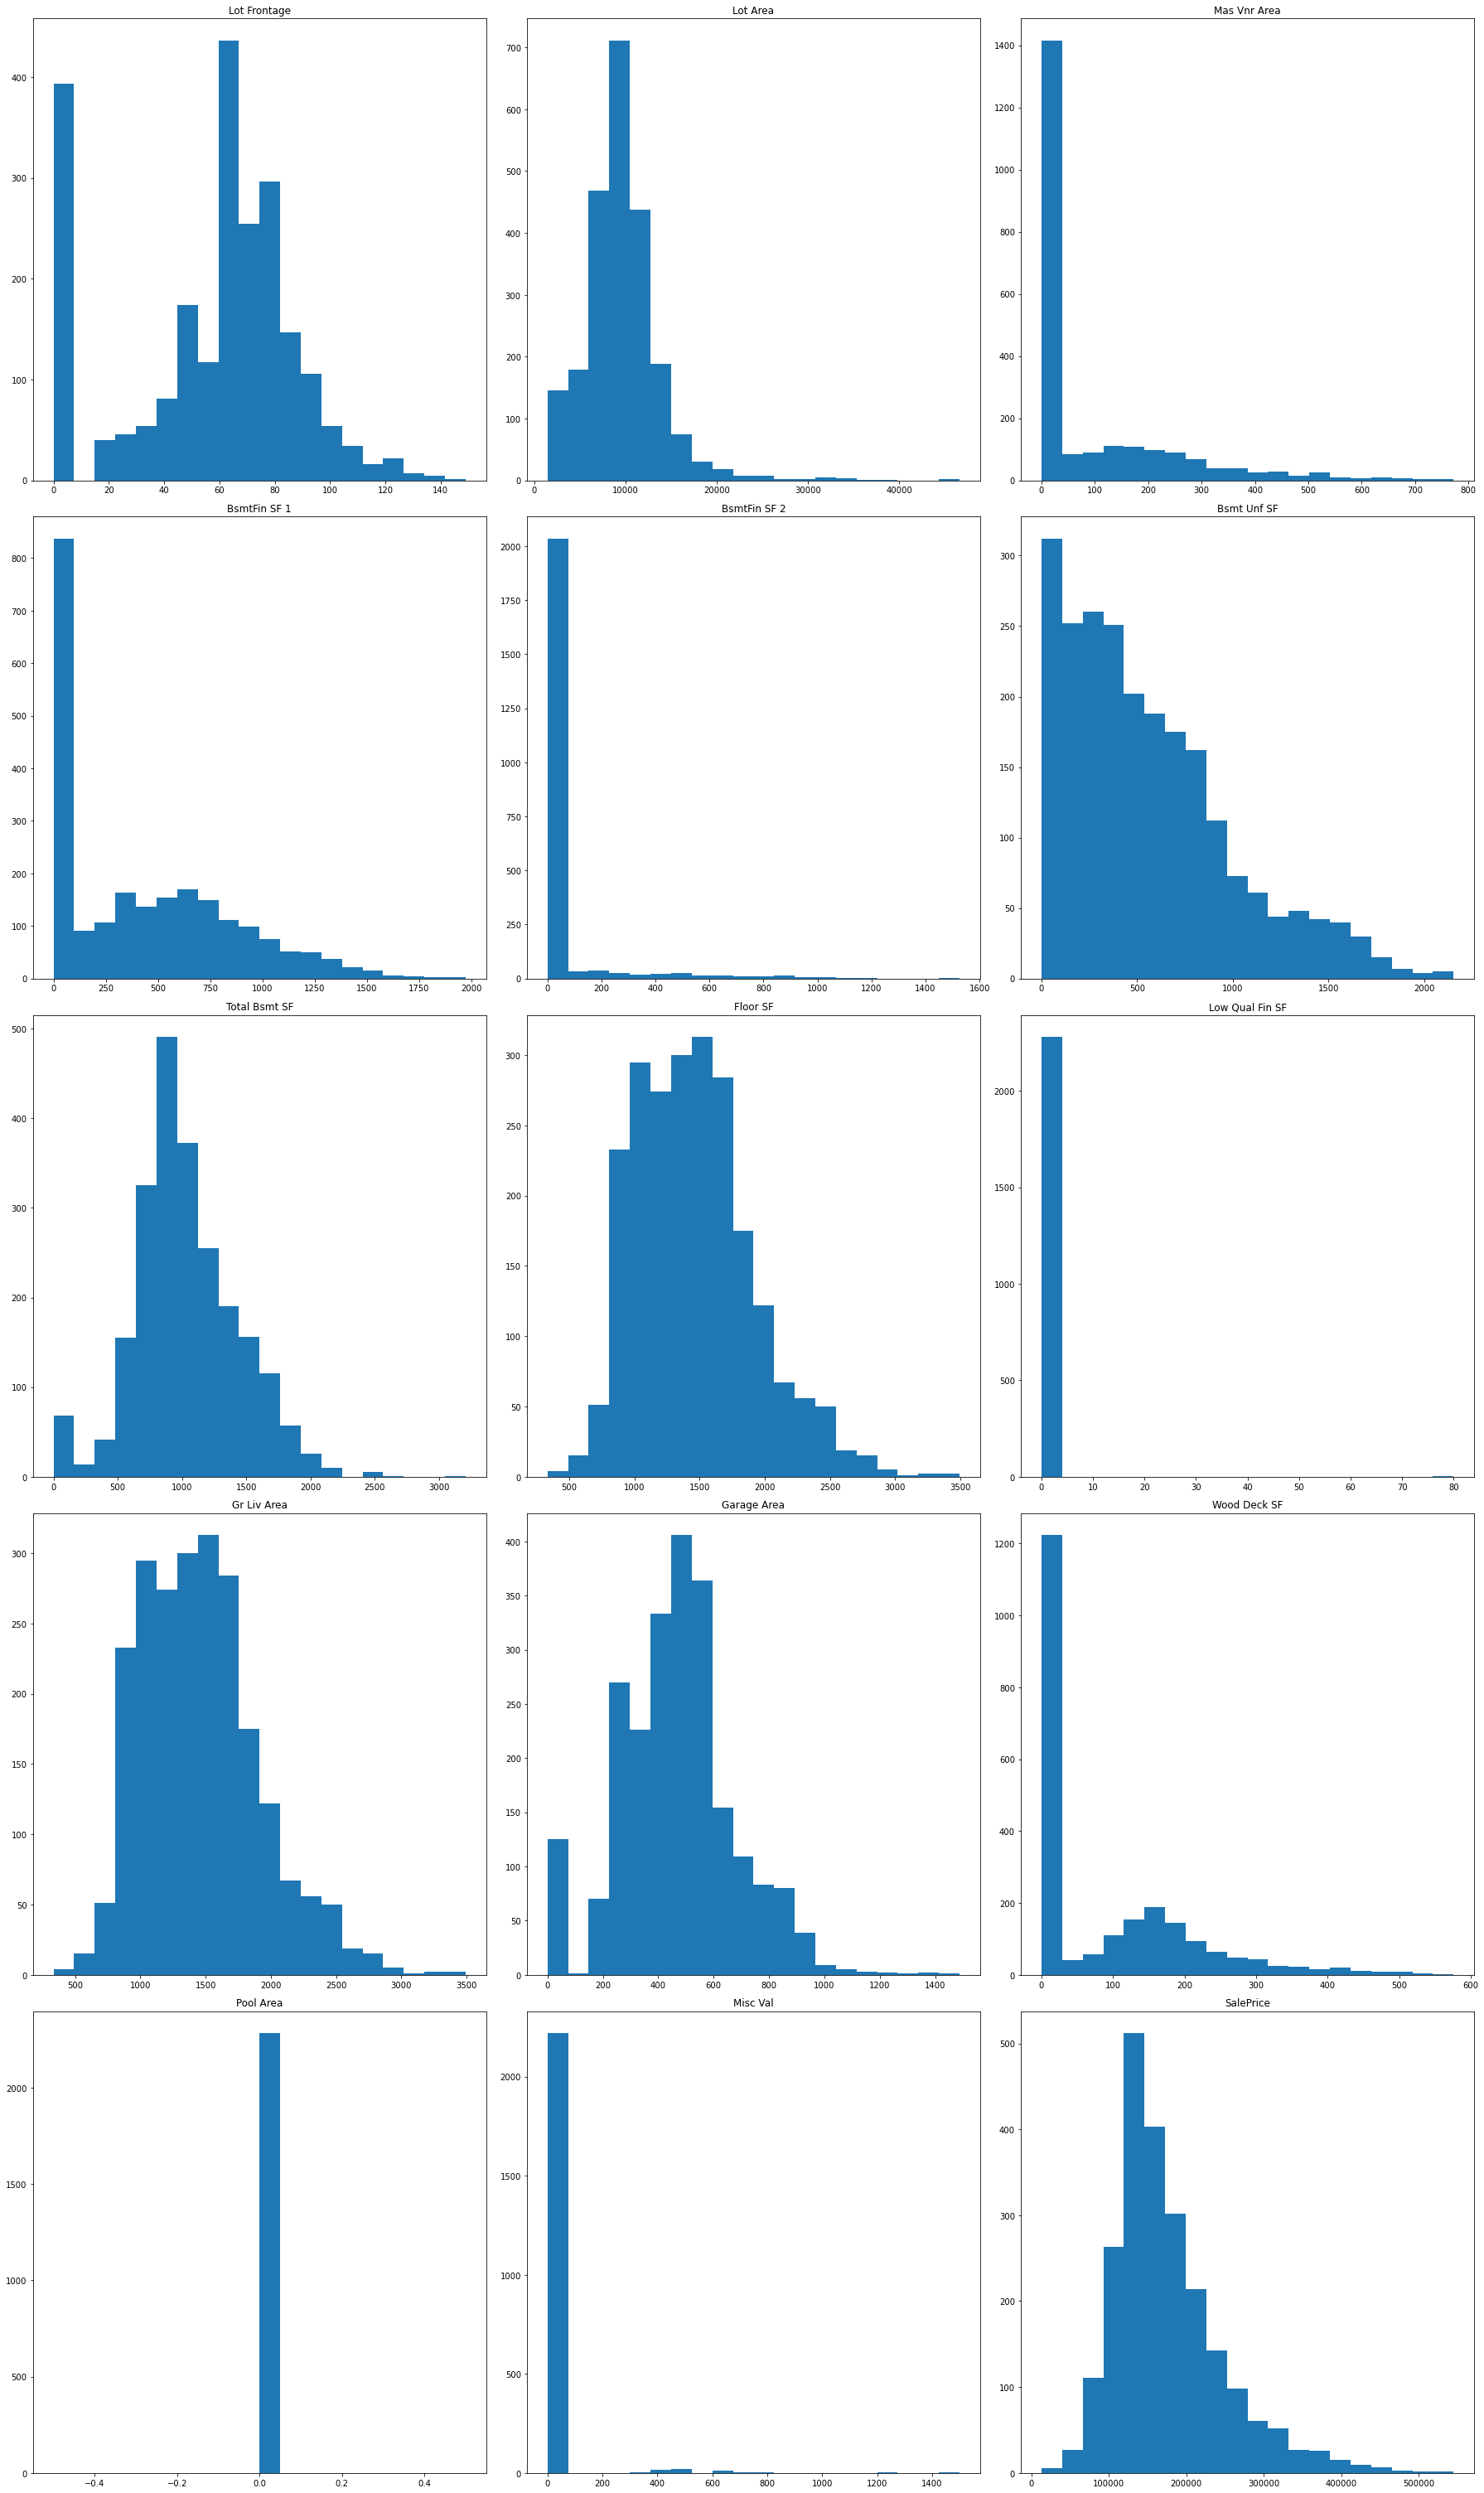

In [40]:
figure = plt.figure(figsize=(25, 50))

for col in (continuous):
    subplot = figure.add_subplot(6, 3, continuous.index(col)+1)
    plt.hist(data[col], 20)
    plt.title(''+ col)

figure.tight_layout()

plt.show()

First, we can see that some of those features have almost 100% of values that are 0. Therefore, they don't give us information, and w will drop them. 

We can see that few of them are normally distributed. So let's apply a log transformation for some of them.

In [41]:
log_list = ['Lot Area',
            'Mas Vnr Area',
            'BsmtFin SF 1',
            'BsmtFin SF 2',
            'Wood Deck SF',
            'Open Porch SF',
            'Enclosed Porch',
            'Screen Porch',
            'Bsmt Unf SF',
            'SalePrice']

In [42]:
for feature in log_list:
    data[feature] = np.log1p(data[feature])

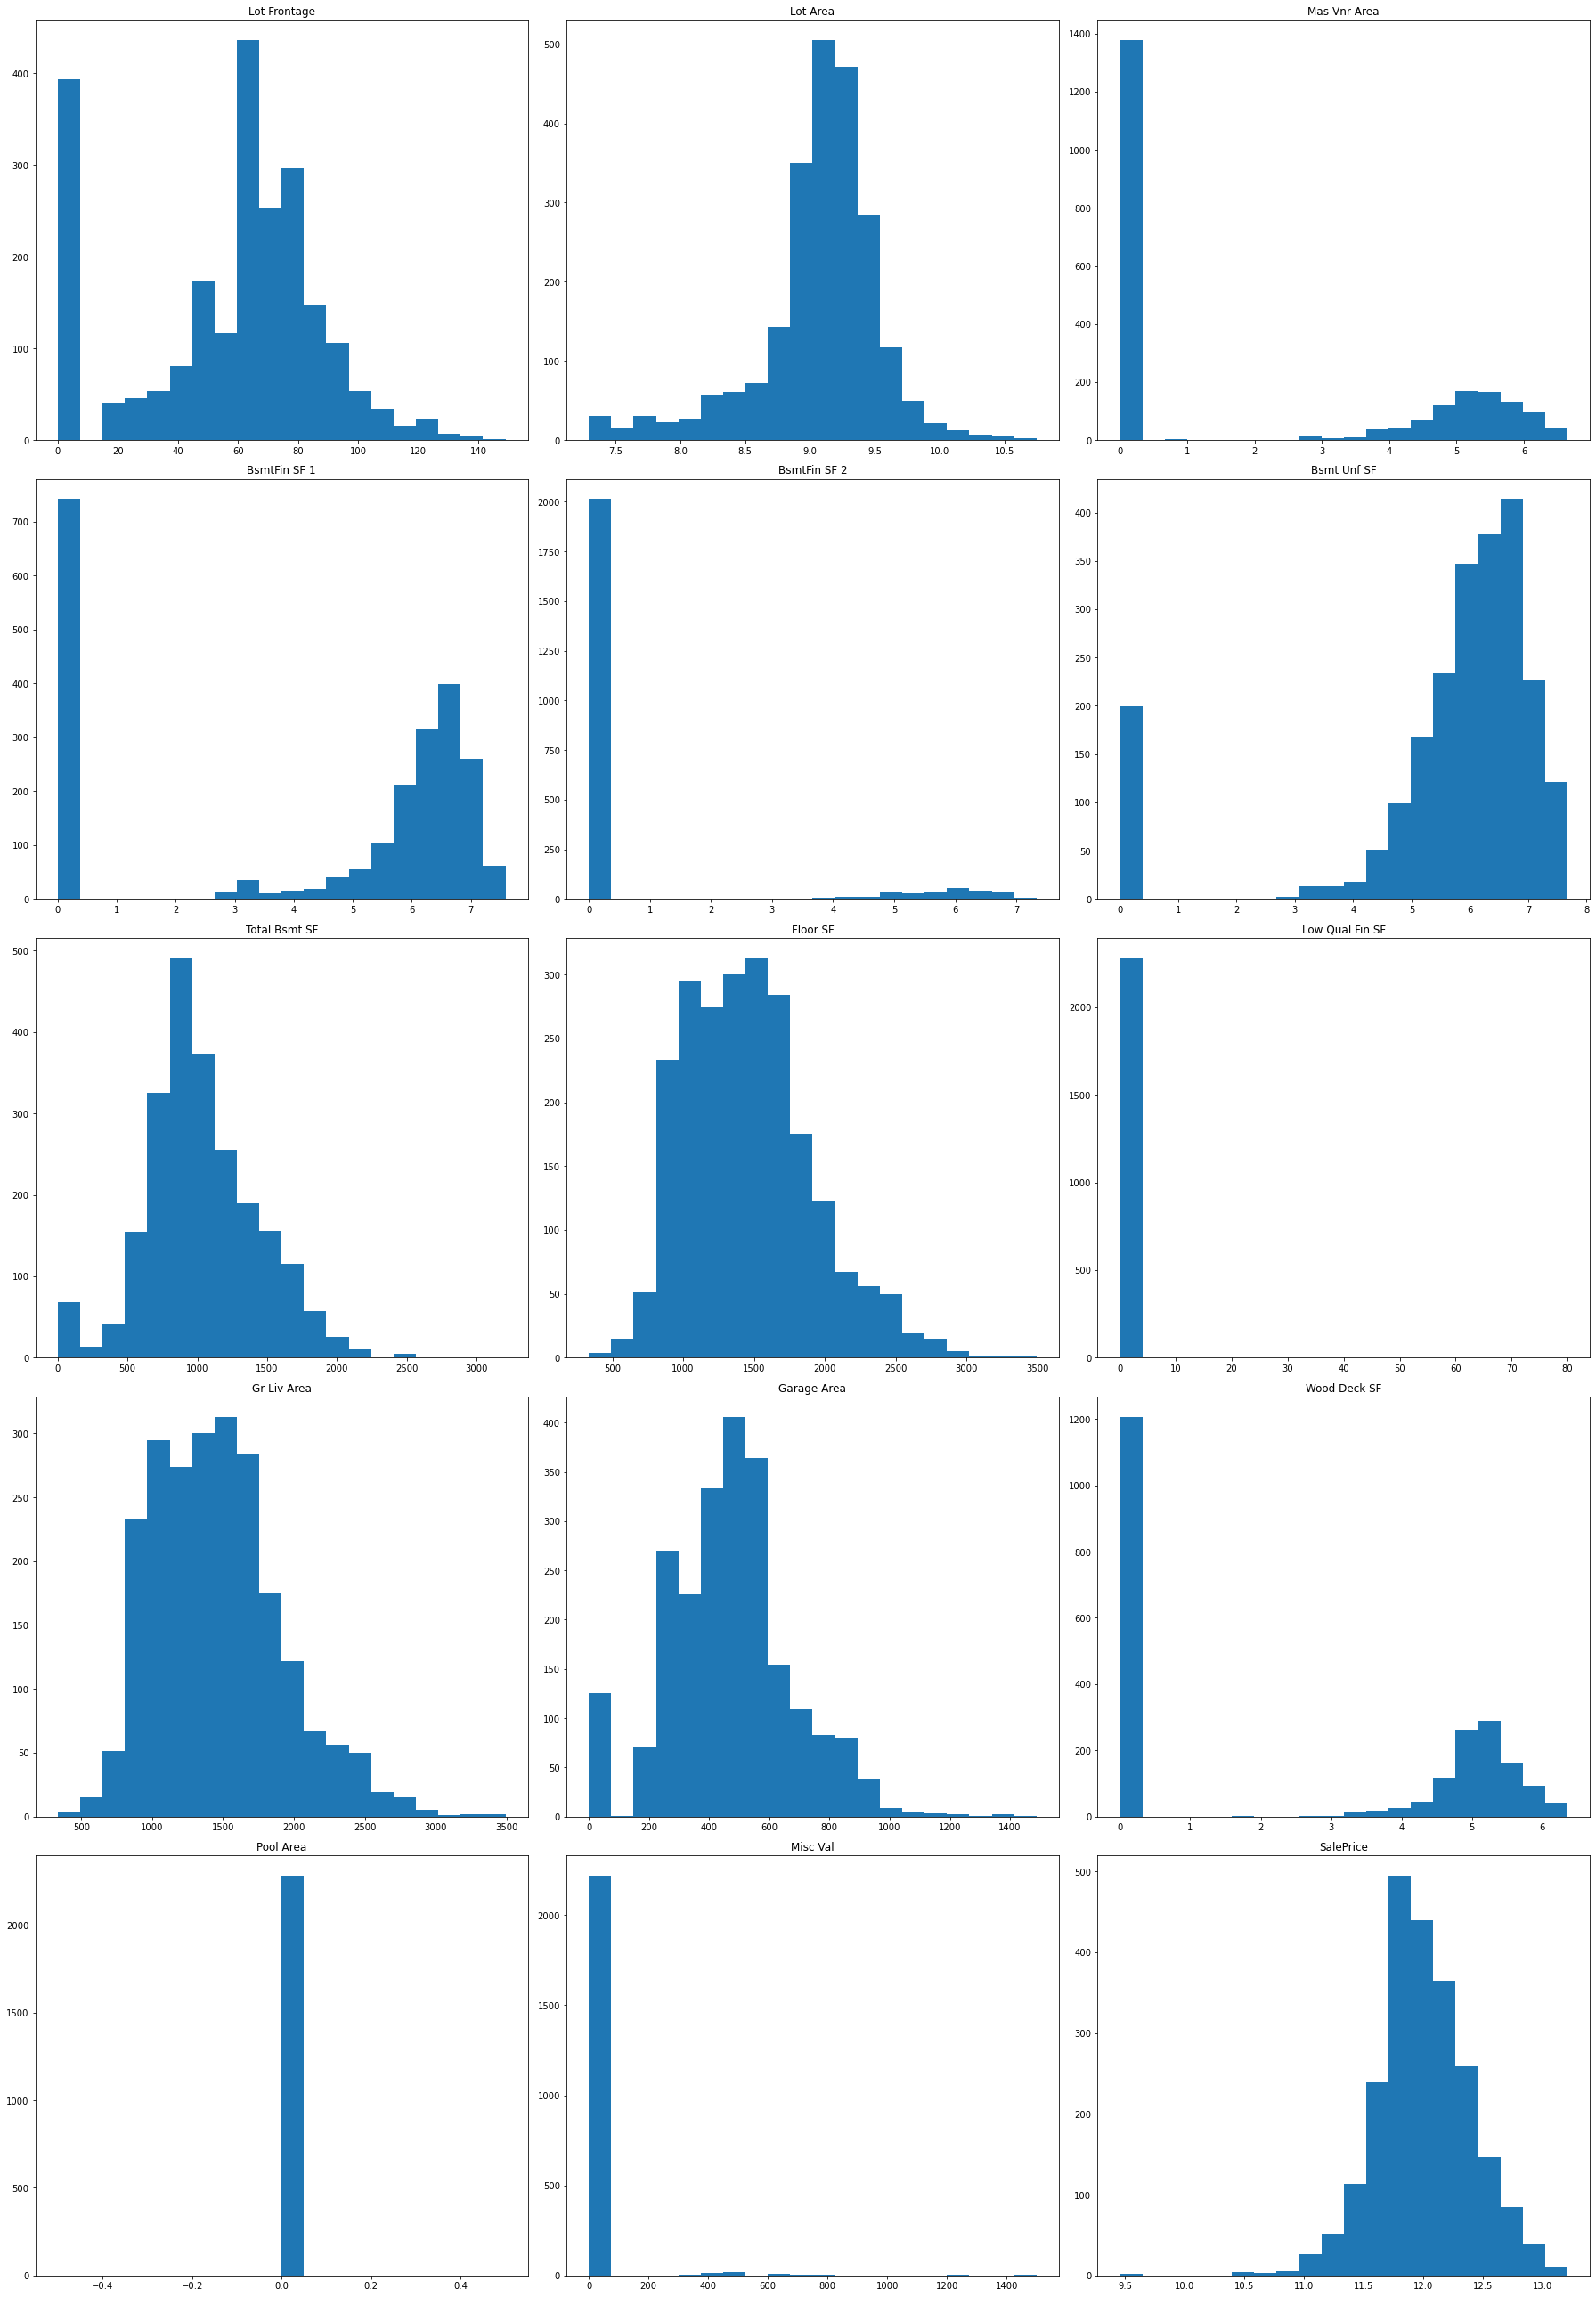

In [43]:
figure = plt.figure(figsize=(25, 50))

for col in (continuous):
    subplot = figure.add_subplot(7, 3, continuous.index(col)+1)
    plt.hist(data[col], 20)
    plt.title(''+ col)

figure.tight_layout()

plt.show()

We can see that it is now way better and all our features look like normal distribution.

Now, for the same continuous variables, let's create new polynomials features.

In [44]:
from sklearn.preprocessing import PolynomialFeatures
continuous.remove('SalePrice')

pf_obj = PolynomialFeatures(degree=2, include_bias = False)

for feature in continuous:
    X = pf_obj.fit_transform(data[feature][:, np.newaxis])
    data[feature+'^2'] = X[:, 1]

/var/folders/mk/q507z2ts3294t2g0662rr7100000gn/T/ipykernel_43270/1138164917.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = pf_obj.fit_transform(data[feature][:, np.newaxis])
/var/folders/mk/q507z2ts3294t2g0662rr7100000gn/T/ipykernel_43270/1138164917.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = pf_obj.fit_transform(data[feature][:, np.newaxis])
/var/folders/mk/q507z2ts3294t2g0662rr7100000gn/T/ipykernel_43270/1138164917.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = pf_obj.fit_transform(data[feature][:, np.newaxis])
/var/folders/mk/q507z2ts3294t2g0662rr

In [45]:
data.shape # Checking new shape of the data

(2283, 253)

We can see that we've created new features.

## Splitting the data

Let's split the data into train and test sets.

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop('SalePrice', axis=1).values
y = data.SalePrice.values

# Split data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=0)

In [47]:
X_tr.shape

(1369, 252)

## Fitting Models

Our dataset looks pretty good and ready for fitting models and model evaluation. We'll first start by creating a function that compute the Mean absolute error.

In [48]:
import numpy as np

# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [49]:
from sklearn.linear_model import LinearRegression, Ridge

# Function to fit the model
def fit_model(X_train, y_train, X_test):
    
    ridge = Ridge(alpha=1e-4)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    return y_pred

Now that we've created our function to fit models and compute their MAE, let's create models. Remember that we applied a log transformation on the sale prices. Therefore, we'll apply an exponential transformation when computing the MAE in order to have the MAE in dollars

In [50]:
# Compute the mean absolute error for the baseline.
mae_baseline = MAE(np.exp(y_tr), np.exp(np.median(y_te)))

Then we'll now create a model with two features that should represent well the data. We will therefore choose the 'Floor SF' and the 'Overall Qual', because those 2 variables are the one that describe the best the house (they give an overview of the quality and the size of an house). Moreover, they seem to be highly correlated with the saleprice.

In [51]:
# Creating the dataframe with our values for the simple model
simple_df = data[['Floor SF', 'Overall Qual', 'SalePrice']]

# Creating the target values
X_s = simple_df.drop('SalePrice', axis=1).values
y_s = simple_df.SalePrice.values

# Split the simple data into train and test 
X_s_tr, X_s_te, y_s_tr, y_s_te = train_test_split(X_s, y_s, train_size=0.6, test_size=0.4, random_state=0)

# Fitting the simple model
y_s_pred = fit_model(X_s_tr, y_s_tr, X_s_te)

# Computing the mean absolute error of the simple model
mae_simple = MAE(np.exp(y_s_te), np.exp(y_s_pred))

Now let's fit an intermediate model with around 10 features. For those feature we'll take the two features that we already used for the first simple model. Then we will add some others features that represent well the house.

In [52]:
# Putting all the features in a list
intermediate_list = ['Floor SF',
                     'Overall Qual',
                     'SalePrice',
                     'Total Bsmt SF',
                     'Lot Frontage',
                     'Gr Liv Area',
                     'Garage Area',
                     'Bsmt Unf SF',
                     'Garage Qual',
                     'Garage Cond',
                     'Exter Cond',
                     'Bsmt Qual',
                     'Bsmt Cond']

In [53]:
# Creating the dataframe with our values for the intermediate model
inter_df = data[intermediate_list]

# Creating the target values
X_i = inter_df.drop('SalePrice', axis=1).values
y_i = inter_df.SalePrice.values

# Split the simple data into train and test 
X_i_tr, X_i_te, y_i_tr, y_i_te = train_test_split(X_i, y_i, train_size=0.6, test_size=0.4, random_state=0)

# Fitting the simple model
y_i_pred = fit_model(X_i_tr, y_i_tr, X_i_te)

# Computing the mean absolute error of the simple model
mae_inter = MAE(np.exp(y_i_te), np.exp(y_i_pred))

Now, let's create our complex model with all the features and using regularization.

First, let's rescale our features.

In [54]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

In [55]:
X_tr_rescaled.shape

(1369, 252)

The regularization will help us to not overfit the data when constructiong our complex model. The objective is to add a constraints that will maximize the loss function if the set of parameters of our model is too big. This will therefore prevent from overfitting. We already used regularization with our model from before with the Ridge. But in this case, we'll look for the best alpha using grid search, while we put it at 1e-4 before.

Let's find the best 'regulator' with the grid search.

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

results = []

# Grid search
for alpha in np.logspace(-8, 8, num=50):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    results.append({"alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(np.exp(y_tr), np.exp(ridge.predict(X_tr_rescaled))),
            "validation_mse": MSE(y_te, ridge.predict(X_te_rescaled)),
            "validation_mae": MAE(np.exp(y_te), np.exp(ridge.predict(X_te_rescaled))),})

In [57]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.head()

,alpha,train_mse,train_mae,validation_mse,validation_mae
0,1.000000e-08,0.009088,10520.372189,0.014048,12858.461222
1,2.120951e-08,0.009088,10520.372189,0.014048,12858.446570
2,4.498433e-08,0.009088,10520.372188,0.014048,12858.443095
3,9.540955e-08,0.009088,10520.372188,0.014048,12858.441555
4,2.023590e-07,0.009088,10520.372187,0.014048,12858.441622


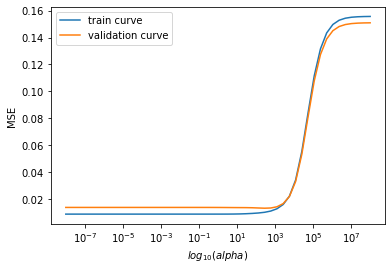

In [58]:
# Plot the validation curves
plt.semilogx(results_df["alpha"], results_df["train_mse"], label="train curve")
plt.semilogx(results_df["alpha"], results_df["validation_mse"], label="validation curve")
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

It looks like the opitmal value for alpha is anywhere below 1e3, where the model overfit but has a low mse. Over this value, the model start underfitting, as the model perform worse.

Now let's compare the results of our different model.

In [59]:
# Printing different MAE

print('MAE of the baseline:', mae_baseline,'$')
print('MAE of the simple model:', mae_simple,'$')
print('MAE of the intermediate model:', mae_inter,'$')
print('MAE of the complex model:', results_df['validation_mae'].min(),'$')

MAE of the baseline: 52597.92987582177 $
MAE of the simple model: 24156.107378712353 $
MAE of the intermediate model: 18997.83593260127 $
MAE of the complex model: 12553.006216497413 $


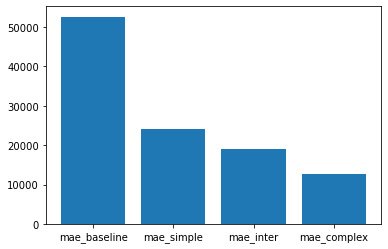

In [60]:
x_cor = ['mae_baseline', 'mae_simple', 'mae_inter', 'mae_complex']
y_cor = [mae_baseline, mae_simple, mae_inter, results_df['validation_mae'].min()]

plt.bar(x_cor, y_cor)
plt.show()

We can see that the complex model is clearly better than the two others.